# DATA 691 - Summer 2025 - Assignment 2

### 1. Fashion MNIST

Download the [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist) from Kaggle.

Load the 60,000 training examples (`fashion-mnist_train.csv`) and split it into equal size ***training*** and ***validation*** subsets.

Your goal is to fit the best model you can to the training subset of size 30,000 constructed above, where best means highest accuracy on the validation set of size 30,000 constructed above.

Your models should be pipelines with constituents chosen among the following:

- `sklearn.preprocessing.StandardScaler`

- `sklearn.preprocessing.Normalizer`

- `sklearn.decomposition.PCA`

- `sklearn.linear_model.LogisticRegression`

- `sklearn.svm.SVC`

You don't have to use all of them!

Restrict your parameter tuning to the the regularization parameter `C` of `LogisticRegression`/`SVC` and the `n_components` parameter of `PCA`.

I suggest starting your analysis with a small subset of the training data, growing it as you identify good combinations of pipeline constituents and parameters.

Once you have settled on an optimal model, evaluate it on the test set (`fashion-mnist_test.csv`) and report the corresponding accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

In [112]:
X = pd.read_csv("fashion-mnist/fashion-mnist_train.csv")
y = X.pop("label")

X_test = pd.read_csv("fashion-mnist/fashion-mnist_test.csv")
y_test = X_test.pop("label")

In [ ]:
estimator = make_pipeline(Normalizer(), LogisticRegression(max_iter=1000))
logisticregression__C = np.logspace(0, 3, 10)
param_grid = {"logisticregression__C": logisticregression__C}
search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring="accuracy",
    cv=2,
    refit=True,
    verbose=4,
    n_jobs=-1,
)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_).sort_values(by="param_logisticregression__C")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END .........logisticregression__C=1.0;, score=0.842 total time=  33.3s
[CV 1/2] END .........logisticregression__C=1.0;, score=0.843 total time=  34.3s
[CV 1/2] END logisticregression__C=2.154434690031884;, score=0.849 total time=  55.0s
[CV 2/2] END logisticregression__C=2.154434690031884;, score=0.849 total time= 1.0min
[CV 1/2] END logisticregression__C=4.641588833612778;, score=0.853 total time= 1.1min
[CV 2/2] END logisticregression__C=4.641588833612778;, score=0.853 total time= 1.1min
[CV 1/2] END ........logisticregression__C=10.0;, score=0.855 total time= 1.1min
[CV 2/2] END ........logisticregression__C=10.0;, score=0.854 total time= 1.2min
[CV 2/2] END logisticregression__C=21.544346900318832;, score=0.854 total time=  57.9s
[CV 1/2] END logisticregression__C=21.544346900318832;, score=0.856 total time= 1.1min
[CV 1/2] END logisticregression__C=46.41588833612777;, score=0.855 total time=  44.6s
[CV 2/2] EN

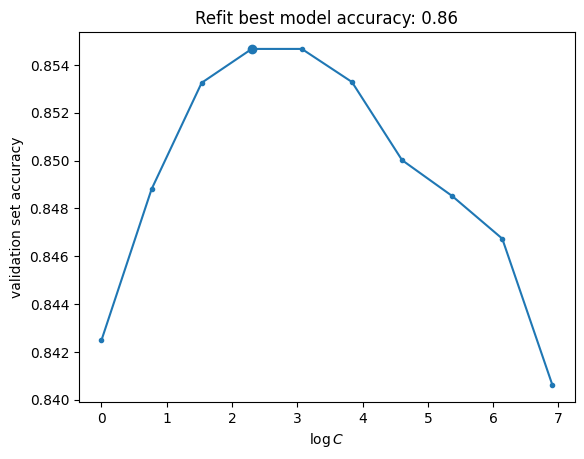

In [ ]:
refit_acc = accuracy_score(y_test, search.predict(X_test))
u = results["param_logisticregression__C"]
v = results["mean_test_score"]
plt.plot(np.log(u), v, marker="o", markersize=3)
plt.plot(
    np.log(search.best_params_["logisticregression__C"]), search.best_score_, "C0o"
)
plt.xlabel("$\\log C$")
plt.ylabel("validation set accuracy")
plt.title(f"Refit best model accuracy: {refit_acc:.2f}")
plt.show()

#### `SVC`

- `Normalizer` performed better than both `StandardScaler` and no preprocessing.

- Best `C` parameter for `SVC`, estimated using 2-fold cross-validation was 4.64. Test set accuracy of the corresponding model refit all 60,000 training samples was 0.91.

- PCA did not yield any further gains.

In [ ]:
estimator = make_pipeline(Normalizer(), SVC())
svc__C = np.logspace(0, 3, 10)
param_grid = {"svc__C": svc__C}
search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring="accuracy",
    cv=2,
    refit=True,
    verbose=4,
    n_jobs=-1,
)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_).sort_values(by="param_svc__C")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END .......................svc__C=10.0;, score=0.894 total time= 8.3min
[CV 2/2] END ..........svc__C=4.641588833612778;, score=0.894 total time= 8.3min
[CV 2/2] END ..........svc__C=2.154434690031884;, score=0.890 total time= 8.5min
[CV 1/2] END ..........svc__C=2.154434690031884;, score=0.893 total time= 8.5min
[CV 1/2] END .......................svc__C=10.0;, score=0.896 total time= 8.5min
[CV 1/2] END ..........svc__C=4.641588833612778;, score=0.897 total time= 8.5min
[CV 2/2] END ........................svc__C=1.0;, score=0.883 total time= 8.8min
[CV 1/2] END ........................svc__C=1.0;, score=0.886 total time= 8.9min
[CV 2/2] END .........svc__C=21.544346900318832;, score=0.894 total time= 8.5min
[CV 1/2] END .........svc__C=21.544346900318832;, score=0.895 total time= 8.6min
[CV 2/2] END ..........svc__C=46.41588833612777;, score=0.891 total time= 8.5min
[CV 2/2] END ......................svc__C=100.0;

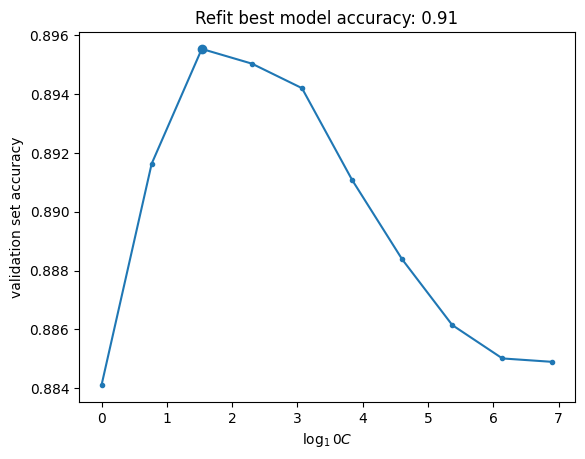

In [ ]:
refit_acc = accuracy_score(y_test, search.predict(X_test))
u = results["param_svc__C"]
v = results["mean_test_score"]
plt.plot(np.log(u), v, marker="o", markersize=3)
plt.plot(np.log(search.best_params_["svc__C"]), search.best_score_, "C0o")
plt.xlabel("$\\log_10 C$")
plt.ylabel("validation set accuracy")
plt.title(f"Refit best model accuracy: {refit_acc:.2f}")
plt.show()

### 2. SMS spam filtering

In this activity, we'll try to flag spam SMS messages based on the text of the message.

The dataset comes from the UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)).

I preprocessed it a bit. Load it from `data/sms_spam.csv`.

#### Manual feature extraction

If you examine some of the messages in the dataset, you'll notice some patterns that you might exploit for classifying spam messages. 

Add the following features to the dataframe:

- `length`, the length of a message, in characters,

- `num_caps`, the number of capital letters in a message,

- `proportion_caps` the proportion of capital letters in a message,

- `num_digits`, the number of digits in a message,

- `proportion_digits` the proportion of digits in a message,

- binary features `contains_<char>` indicating whether each of the following characters occurs in a message:
`@`, `#`, `$`, `*`, `/`, `:`, `-`, `+`, `£`, `(`, `)`, `[`, `]`, `;`, `<`, `>`, `?`

Compute cross-validated accuracy, $F_1$, precision, and recall metrics for `LogisticRegression`, `SGDClassifier`, and `LinearSVC` models fit to the the data using these features that you extracted.
If you do this using `cross_val_score`, you'll need to loop over the metrics yourself. If you use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) instead (try it!) you can pass in a list of metrics.

How do the models compare across the various metrics?

#### Feature extraction with `CountVectorizer`

Compute cross-validated accuracy, $F_1$, precision, and recall metrics for `LogisticRegression`, `SGDClassifier`, `LinearSVC`, and `MultinomialNB` models fit to the data, extracting features using `CountVectorizer`.
How do the models compare across the various metrics?

Can you improve performance by tuning parameters of the vectorizer or the classifier? Does swapping out `CountVectorizer` with `TfidfVectorizer` improve any metrics?


#### Spam detection: Hand-crafted features

In [98]:
df = pd.read_csv("data/sms_spam.csv")
df["length"] = df["message"].str.len()
df["num_caps"] = df["message"].str.count(r"[A-Z]")
df["proportion_caps"] = df["num_caps"] / df["length"]
df["num_digits"] = df["message"].str.count(r"[0-9]")
for ch in [
    "@",
    "#",
    "$",
    "*",
    "/",
    ":",
    "-",
    "+",
    "£",
    "(",
    ")",
    "[",
    "]",
    ";",
    "<",
    ">",
    "?",
]:
    df[f"contains_{ch}"] = df["message"].str.contains(ch, regex=False)

In [109]:
X = df.iloc[:, 2:]
df["is_spam"]

metrics = ["f1", "precision", "recall", "accuracy"]

candidates = [
    (LogisticRegression(), "C", np.logspace(0, 3, 10)),
    (LinearSVC(max_iter=100_000), "C", np.logspace(0, 3, 10)),
    (SVC(), "C", np.logspace(0, 3, 10)),
]
scores = []

for model, param_name, param_values in candidates:
    model_name = model.__class__.__name__.lower()
    estimator = make_pipeline(StandardScaler(), model)
    param_grid = {f"{model_name}__{param_name}": param_values}
    search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=metrics,
        refit="f1",  # so that search.best_index_ is available
        cv=RepeatedStratifiedKFold(),
        verbose=1,
    )
    search.fit(X, y)
    s = pd.DataFrame(search.cv_results_).iloc[search.best_index_][
        ["params"] + [f"mean_test_{metric}" for metric in metrics]
    ]
    s.name = model.__class__.__name__
    scores.append(s)

results = (
    pd.concat(scores, axis=1)
    .T.rename(columns={f"mean_test_{metric}": metric for metric in metrics})
    .sort_values(by="f1", ascending=False)
)
results

Fitting 50 folds for each of 10 candidates, totalling 500 fits
Fitting 50 folds for each of 10 candidates, totalling 500 fits
Fitting 50 folds for each of 10 candidates, totalling 500 fits


,params,f1,precision,recall,accuracy
SVC,{'svc__C': 10.0},0.914652,0.953551,0.879277,0.978023
LinearSVC,{'linearsvc__C': 2.154434690031884},0.907231,0.955518,0.864253,0.976354
LogisticRegression,{'logisticregression__C': 1.0},0.902479,0.947618,0.861723,0.975062


`SVC` achieves the highest cross-validated $F_1$-score.

#### Spam detection: Bag-of-words features

- I use stratified 5-fold cross-validation to evaluate `LogisticRegression`, `LinearSVC`, `SVC`, and `MultinomialNB` models fit to sparse features extracted by `TfidfVectorizer`.

- Models are ranked using $F_1$-score. I also compute precision, recall, and accuracy metrics.

- I tune the `C` parameters of `LogisticRegression`, `LinearSVC`, and `SVC`, and the `alpha` parameter of `MultinomialNaiveBayes`.

- I tune the `use_idf` parameter of `TfidfVectorizer`. Note that  `TfidfVectorizer` automatically normalizes its outputs. In particular, `TfidfVectorizer(use_idf=False)` is equivalent to `CountVectorizer()` followed by `Normalizer()`explaining why I haven't considered `CountVectorizer` separately.

In [ ]:
metrics = ["f1", "precision", "recall", "accuracy"]

candidates = [
    (LogisticRegression(), "C", np.logspace(0, 3, 10)),
    (LinearSVC(max_iter=100_000), "C", np.logspace(0, 3, 10)),
    (SVC(), "C", np.logspace(0, 3, 10)),
    (MultinomialNB(), "alpha", np.logspace(-3, -1, 10)),
]
scores = []

for model, param_name, param_values in candidates:
    model_name = model.__class__.__name__.lower()
    search = GridSearchCV(
        estimator=make_pipeline(TfidfVectorizer(), model),
        param_grid={
            f"{model_name}__{param_name}": param_values,
            "tfidfvectorizer__use_idf": [
                False,
                True,
            ],  # False means CountVectorizer followed by L2-normalization
        },
        scoring=metrics,
        refit="f1",  # so that search.best_index_ is available
        cv=RepeatedStratifiedKFold(),
        verbose=1,
    )
    search.fit(df["message"], df["is_spam"])  # type: ignore
    s = pd.DataFrame(search.cv_results_).iloc[search.best_index_][
        ["params"] + [f"mean_test_{metric}" for metric in metrics]
    ]
    s.name = model.__class__.__name__
    scores.append(s)

results = (
    pd.concat(scores, axis=1)
    .T.rename(columns={f"mean_test_{metric}": metric for metric in metrics})
    .sort_values(by="f1", ascending=False)
)
results

Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Fitting 50 folds for each of 20 candidates, totalling 1000 fits


,params,f1,precision,recall,accuracy
LinearSVC,"{'linearsvc__C': 10.0, 'tfidfvectorizer__use_i...",0.951017,0.983899,0.920486,0.987316
MultinomialNB,"{'multinomialnb__alpha': 0.021544346900318832,...",0.946971,0.987757,0.909759,0.986383
LogisticRegression,"{'logisticregression__C': 100.0, 'tfidfvectori...",0.943867,0.97642,0.913775,0.985468
SVC,"{'svc__C': 4.641588833612778, 'tfidfvectorizer...",0.940109,0.990891,0.894659,0.984769
